In [ ]:
!nvidia-smi

Wed Oct 18 00:32:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              13W / 130W |    289MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvidia-smi -l 1

Wed Oct 18 00:35:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              13W / 130W |    154MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!unzip /content/drive/MyDrive/ham10000.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install scipy

In [ ]:
# Paths
metadata_path = 'metadata.csv'
img_dir1 = 'images_part_1'
img_dir2 = 'images_part_2'

In [ ]:
# Constants
IMG_SIZE = 480
# Load Data
metadata = pd.read_csv(metadata_path)

In [ ]:
# Image Preprocessing
def process_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return img / 255.0

metadata['path'] = metadata['image_id'].apply(lambda x: os.path.join(img_dir1, x + '.jpg')
                                  if os.path.exists(os.path.join(img_dir1, x + '.jpg'))
                                  else os.path.join(img_dir2, x + '.jpg'))
metadata['image'] = metadata['path'].apply(process_image)

In [ ]:
metadata.head()

In [ ]:
metadata = pd.read_csv("output.csv")

In [ ]:
metadata.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = metadata['dx']

# Using segmented images for training
X = np.stack(metadata['image'].values)

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
220/220 [==============================] - 59s 263ms/step - loss: 0.9691 - accuracy: 0.6760 - val_loss: 0.8971 - val_accuracy: 0.6997
Epoch 2/5
220/220 [==============================] - 58s 263ms/step - loss: 0.7670 - accuracy: 0.7305 - val_loss: 0.8977 - val_accuracy: 0.6778
Epoch 3/5
220/220 [==============================] - 57s 260ms/step - loss: 0.3938 - accuracy: 0.8653 - val_loss: 1.0968 - val_accuracy: 0.6684
Epoch 4/5
220/220 [==============================] - 55s 250ms/step - loss: 0.1587 - accuracy: 0.9462 - val_loss: 1.8021 - val_accuracy: 0.6059
Epoch 5/5
220/220 [==============================] - 54s 247ms/step - loss: 0.0651 - accuracy: 0.9793 - val_loss: 2.2343 - val_accuracy: 0.6751


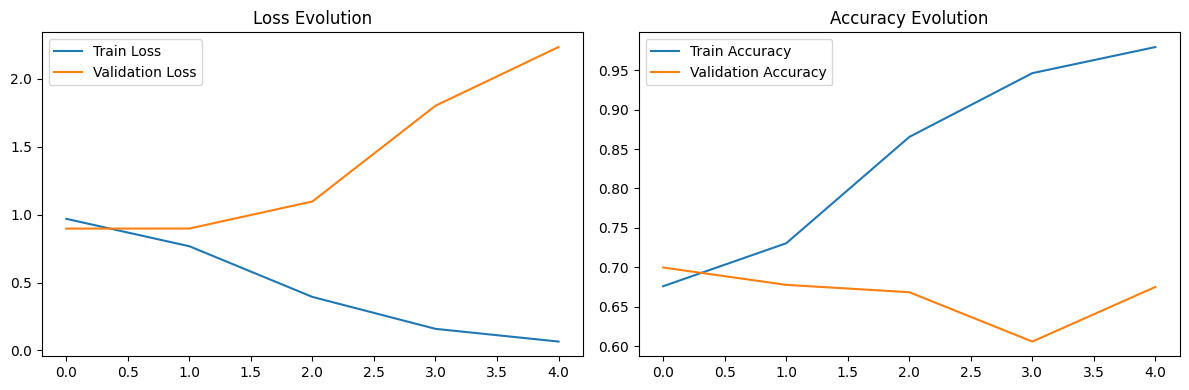

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and store the history
history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Plotting Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.tight_layout()
plt.show()


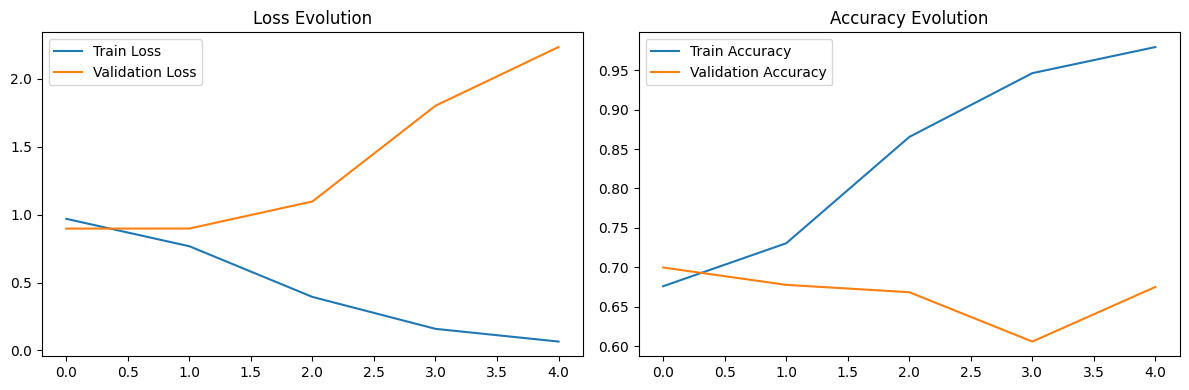

In [ ]:
# Plotting Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='relu')
])

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
for idx, item in enumerate(X_train[:5]):
    print(f"Item {idx + 1} is of type {type(item)}")

In [ ]:
import re

def string_to_array(img_data):
    # Check if the data is bytes and decode to string if necessary
    if isinstance(img_data, bytes):
        img_data = img_data.decode('utf-8')

    # Replace spaces with commas
    modified_str = re.sub(r"\s+", ",", img_data)

    # Convert string representation back to list
    img_list = ast.literal_eval(modified_str)

    # Convert list to numpy array
    return np.array(img_list)

# Convert string representations back to numpy arrays
X_train = np.array([string_to_array(img_data) for img_data in X_train])
X_val = np.array([string_to_array(img_data) for img_data in X_val])
X_test = np.array([string_to_array(img_data) for img_data in X_test])

In [ ]:
unique_shapes = {img.shape for img in X_train}
print(unique_shapes)


In [ ]:
for idx, item in enumerate(X_train[:5]):
    print(f"Item {idx + 1}: {item}")

In [ ]:
from skimage.transform import resize

X_train = np.array([resize(img, (IMG_SIZE, IMG_SIZE, 3)) for img in X_train])
X_val = np.array([resize(img, (IMG_SIZE, IMG_SIZE, 3)) for img in X_val])
X_test = np.array([resize(img, (IMG_SIZE, IMG_SIZE, 3)) for img in X_test])


In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")